In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("D:/Study/Hackathon analytics vidhya/Hackathon LTFS 3 30012021/Data Prepared for Modelling")

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("df_train2_corr_removed.csv")
df_test = pd.read_csv('df_test2_corr_removed.csv')
df_train = pd.read_csv("D:/Study/Hackathon analytics vidhya/Hackathon LTFS 3 30012021/Data Prepared for Modelling/df_train_Data2.csv")
#df = pd.concat((df,df_train['Top-up Month']), axis=1)
#dictionary = {6 :'No Top-up Service', 0:'> 48 Months',5 :'36-48 Months', 3:'24-30 Months',
#                 4 :'30-36 Months', 2 :'18-24 Months', 1:'12-18 Months'}
#df['Top-up Month'] = df['Top-up Month'].map(dictionary)
X = df.drop(['Top-up Month'],axis=1)
y = df['Top-up Month']

df_train1 = pd.concat((pd.DataFrame(X), pd.DataFrame(y)), axis =1)
train_cols = df_train1.columns
test_cols = df_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

df_train1 = df[common_cols]
#if 'Top-up Month' not in df_train1:
#    df_train1['Top-up Month'] = pd.DataFrame(y)
df_test1 = df_test[common_cols]

df_test1 = df_test1.drop(['Top-up Month'], axis =1)

X = df_train1.drop(['Top-up Month'],axis=1)
#y = df['Top-up Month']

In [8]:
X.head()

,BranchID,Tenure,AssetCost,AmountFinance,EMI,AssetID,ManufacturerID,SupplierID,LTV,AGE,...,ACCOUNT-STATUS_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Settled,ACCOUNT-STATUS_Suit Filed,ACCOUNT-STATUS_WILFUL DEFAULT,ACCOUNT-STATUS_Written Off,ASSET_CLASS_Loss,ASSET_CLASS_Special Mention Account,ASSET_CLASS_Standard,ASSET_CLASS_SubStandard,Loan_Count
0,1,48,450000,275000.0,24000.0,4022465,1568,21946,61.11,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,81
1,333,47,485000,350000.0,10500.0,4681175,1062,34802,70.00,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,169
2,1,68,690000,519728.0,38300.0,25328146,1060,127335,69.77,39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,961
3,125,48,480000,400000.0,11600.0,13021591,1060,25094,80.92,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,16
4,152,44,619265,440000.0,15000.0,3291320,1046,21853,71.05,56,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,49


In [12]:
X_train

array([[1.15839243e-01, 6.25000000e-02, 2.28743902e-01, ...,
        1.66666667e-02, 0.00000000e+00, 1.98413823e-04],
       [2.71867612e-01, 3.28629032e-01, 1.43902439e-01, ...,
        5.55555556e-03, 0.00000000e+00, 4.53517310e-05],
       [5.20094563e-02, 3.83064516e-02, 2.14634146e-01, ...,
        2.77777778e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.77304965e-01, 8.66935484e-02, 1.65853659e-01, ...,
        2.77777778e-03, 0.00000000e+00, 0.00000000e+00],
       [2.12765957e-01, 6.25000000e-02, 1.84878049e-01, ...,
        2.22222222e-02, 0.00000000e+00, 3.57144882e-04],
       [5.39007092e-01, 9.27419355e-02, 2.68292683e-01, ...,
        2.77777778e-03, 0.00000000e+00, 0.00000000e+00]])

In [14]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(64, activation = 'relu', input_dim = 103))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 7,activation='softmax'))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

# Fitting the ANN to the Training set
model.fit(X_train, y_train,batch_size = 10, epochs = 100)

Epoch 1/100


UnimplementedError:  Cast string to float is not supported
	 [[node Cast (defined at <ipython-input-14-124e175991d7>:35) ]] [Op:__inference_train_function_2694]

Function call stack:
train_function


In [9]:
predictions = model.predict(X_test)
predictions

array([[0.06219494],
       [0.1572395 ],
       [0.07254204],
       ...,
       [0.08879003],
       [0.77856565],
       [0.14358464]], dtype=float32)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

,0
0,0
1,0
2,0
3,0
4,0
...,...
29610,1
29611,0
29612,0
29613,1


ANN  train roc-auc: 0.8288461895487234
ANN test roc-auc: 0.5647074903094262
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     23126
           1       0.77      0.31      0.44      6489

    accuracy                           0.83     29615
   macro avg       0.80      0.64      0.67     29615
weighted avg       0.82      0.83      0.80     29615

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2025
           1       0.28      0.11      0.16       551

    accuracy                           0.75      2576
   macro avg       0.53      0.52      0.51      2576
weighted avg       0.68      0.75      0.70      2576



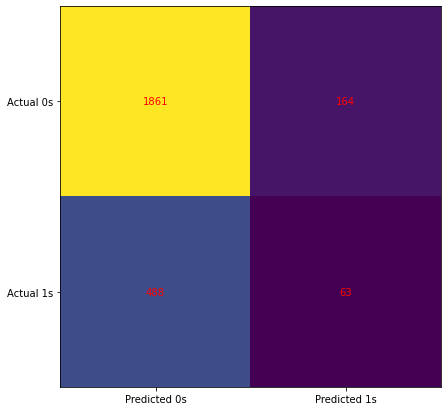

AUC: 0.5647074903094262


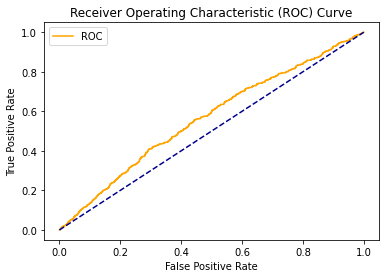

In [16]:
ytrain_pred = model.predict_proba(X_train)
print('ANN  train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred)))
ytest_pred = model.predict_proba(X_test)
print('ANN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred)))
y_pred_train = np.where(model.predict(X_train)>.5,1,0)
# Train Prediction classification report
print(classification_report(y_train,pd.DataFrame(y_pred_train.flatten()) ))

y_pred_test = np.where(model.predict(X_test)>.5,1,0)
# Test Prediction classification report
print(classification_report(y_test, y_pred_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test))
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test) )
plot_roc_curve(fpr,tpr,model)

In [19]:
y_pred_train = pd.DataFrame(model.predict(X_test).flatten())
from sklearn.metrics import f1_score
f1score_ls=[]
for thres in thresholds:
    y_pred = np.where(y_pred_test>thres,1,0)
    f1score_ls.append(f1_score(y_test, y_pred))
    
f1score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1score_ls)],axis=1)
f1score_ls.columns = ['thresholds', 'f1score']
f1score_ls.sort_values(by='f1score', ascending=False, inplace=True)
f1score_ls.head()

,thresholds,f1score
446,0.191562,0.161954
599,0.114814,0.161954
588,0.120200,0.161954
589,0.119561,0.161954
590,0.119448,0.161954


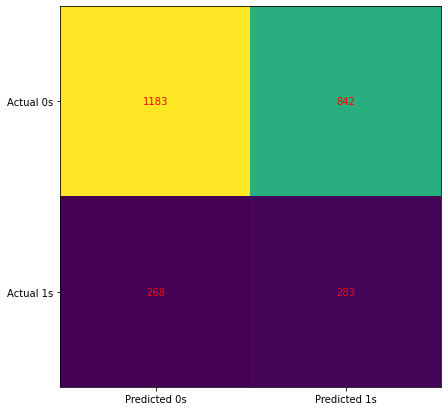

In [22]:
# Making the Confusion Matrix for threshold as accuracy threshold
from sklearn.metrics import confusion_matrix
y_pred_test = np.where(model.predict(X_test)>f1score_ls.iloc[0,0],1,0)
cm = confusion_matrix(y_test,  y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Calculate the ROc Curve
#fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test) )
#plot_roc_curve(fpr,tpr,model)

In [23]:
y_pred_train = np.where(model.predict(X_train)>f1score_ls.iloc[0,0],1,0)
# Train Prediction classification report
print(classification_report(y_train,pd.DataFrame(y_pred_train.flatten()) ))

y_pred_test = np.where(model.predict(X_test)>f1score_ls.iloc[0,0],1,0)
# Test Prediction classification report
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      0.68      0.78     23126
           1       0.41      0.79      0.54      6489

    accuracy                           0.70     29615
   macro avg       0.67      0.74      0.66     29615
weighted avg       0.81      0.70      0.73     29615

              precision    recall  f1-score   support

           0       0.82      0.58      0.68      2025
           1       0.25      0.51      0.34       551

    accuracy                           0.57      2576
   macro avg       0.53      0.55      0.51      2576
weighted avg       0.69      0.57      0.61      2576



In [26]:
y_pred_train = pd.DataFrame(model.predict(X_test).flatten())
from sklearn.metrics import f1_score
accuracy_ls=[]
for thres in thresholds:
    y_pred = np.where(y_pred_test>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
0,2.000000,0.786102
1,1.000000,0.786102
667,0.078467,0.569099
598,0.115914,0.569099
587,0.120368,0.569099


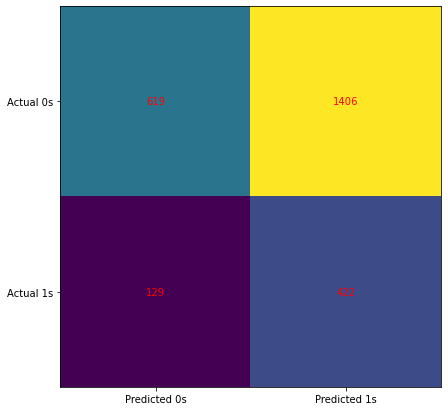

              precision    recall  f1-score   support

           0       0.97      0.37      0.54     23126
           1       0.30      0.96      0.46      6489

    accuracy                           0.50     29615
   macro avg       0.64      0.67      0.50     29615
weighted avg       0.83      0.50      0.52     29615

              precision    recall  f1-score   support

           0       0.83      0.31      0.45      2025
           1       0.23      0.77      0.35       551

    accuracy                           0.40      2576
   macro avg       0.53      0.54      0.40      2576
weighted avg       0.70      0.40      0.43      2576



In [29]:
# Making the Confusion Matrix for threshold as accuracy threshold
from sklearn.metrics import confusion_matrix
y_pred_test = np.where(model.predict(X_test)>accuracy_ls.iloc[2,0],1,0)
cm = confusion_matrix(y_test,  y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

y_pred_train = np.where(model.predict(X_train)>accuracy_ls.iloc[2,0],1,0)
# Train Prediction classification report
print(classification_report(y_train,pd.DataFrame(y_pred_train.flatten()) ))

y_pred_test = np.where(model.predict(X_test)>accuracy_ls.iloc[2,0],1,0)
# Test Prediction classification report
print(classification_report(y_test, y_pred_test))

In [17]:
#
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#matrix = confusion_matrix(y_test, y_pred)

In [11]:
confusion_matrix(y_train, model.predict(X_train).round()) # Overfitting
#accuracy_score(y_train, model.predict(X_train).round(), normalize=False)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

In [22]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.750388
Precision: 0.292793
Recall: 0.117967
F1 score: 0.168176
Cohens kappa: 0.051664
ROC AUC: 0.559142
[[1868  157]
 [ 486   65]]


In [23]:
# save model and architecture to single file
model.save("ANN_Loan_Default_1.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
from keras.models import load_model
 
# load model
model = load_model('ANN_Loan_Default_1.h5')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1568      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________


In [29]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [30]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [41]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 48))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_m])

In [43]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                490       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 1000)

Epoch 1/1000
199/199 [==============================] - 1s 3ms/step - loss: 0.6510 - accuracy: 0.6601 - f1_m: 0.1353 - val_loss: 0.5394 - val_accuracy: 0.7811 - val_f1_m: 0.0161
Epoch 2/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7783 - f1_m: 0.0096 - val_loss: 0.5211 - val_accuracy: 0.7837 - val_f1_m: 0.0097
Epoch 3/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.5210 - accuracy: 0.7788 - f1_m: 0.0051 - val_loss: 0.5147 - val_accuracy: 0.7836 - val_f1_m: 0.0037
Epoch 4/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7787 - f1_m: 0.0043 - val_loss: 0.5113 - val_accuracy: 0.7843 - val_f1_m: 0.0029
Epoch 5/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.7790 - f1_m: 0.0024 - val_loss: 0.5097 - val_accuracy: 0.7843 - val_f1_m: 0.0037
Epoch 6/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.7791 - f1_m: 

Epoch 92/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4915 - accuracy: 0.7813 - f1_m: 0.0565 - val_loss: 0.5200 - val_accuracy: 0.7800 - val_f1_m: 0.0222
Epoch 93/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7815 - f1_m: 0.0535 - val_loss: 0.5195 - val_accuracy: 0.7787 - val_f1_m: 0.0250
Epoch 94/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7812 - f1_m: 0.0549 - val_loss: 0.5198 - val_accuracy: 0.7795 - val_f1_m: 0.0249
Epoch 95/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7810 - f1_m: 0.0542 - val_loss: 0.5209 - val_accuracy: 0.7792 - val_f1_m: 0.0266
Epoch 96/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7818 - f1_m: 0.0535 - val_loss: 0.5204 - val_accuracy: 0.7785 - val_f1_m: 0.0314
Epoch 97/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7818 - 

199/199 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7836 - f1_m: 0.0944 - val_loss: 0.5262 - val_accuracy: 0.7772 - val_f1_m: 0.0346
Epoch 183/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7822 - f1_m: 0.0871 - val_loss: 0.5265 - val_accuracy: 0.7756 - val_f1_m: 0.0509
Epoch 184/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7832 - f1_m: 0.0907 - val_loss: 0.5275 - val_accuracy: 0.7741 - val_f1_m: 0.0517
Epoch 185/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7833 - f1_m: 0.0934 - val_loss: 0.5266 - val_accuracy: 0.7737 - val_f1_m: 0.0562
Epoch 186/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7832 - f1_m: 0.0921 - val_loss: 0.5275 - val_accuracy: 0.7784 - val_f1_m: 0.0394
Epoch 187/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.7832 - f1_m: 0.0

199/199 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7835 - f1_m: 0.0976 - val_loss: 0.5299 - val_accuracy: 0.7762 - val_f1_m: 0.0441
Epoch 273/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7835 - f1_m: 0.0971 - val_loss: 0.5303 - val_accuracy: 0.7729 - val_f1_m: 0.0554
Epoch 274/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7835 - f1_m: 0.1002 - val_loss: 0.5324 - val_accuracy: 0.7711 - val_f1_m: 0.0590
Epoch 275/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7836 - f1_m: 0.1063 - val_loss: 0.5305 - val_accuracy: 0.7741 - val_f1_m: 0.0466
Epoch 276/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7835 - f1_m: 0.1019 - val_loss: 0.5306 - val_accuracy: 0.7729 - val_f1_m: 0.0512
Epoch 277/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7834 - f1_m: 0.0

199/199 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7842 - f1_m: 0.1099 - val_loss: 0.5318 - val_accuracy: 0.7755 - val_f1_m: 0.0437
Epoch 363/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7836 - f1_m: 0.1034 - val_loss: 0.5318 - val_accuracy: 0.7732 - val_f1_m: 0.0517
Epoch 364/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7840 - f1_m: 0.1082 - val_loss: 0.5321 - val_accuracy: 0.7727 - val_f1_m: 0.0458
Epoch 365/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.7847 - f1_m: 0.1101 - val_loss: 0.5325 - val_accuracy: 0.7748 - val_f1_m: 0.0474
Epoch 366/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7845 - f1_m: 0.1075 - val_loss: 0.5327 - val_accuracy: 0.7739 - val_f1_m: 0.0483
Epoch 367/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7846 - f1_m: 0.1

199/199 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7852 - f1_m: 0.1142 - val_loss: 0.5338 - val_accuracy: 0.7754 - val_f1_m: 0.0410
Epoch 453/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7850 - f1_m: 0.1131 - val_loss: 0.5332 - val_accuracy: 0.7721 - val_f1_m: 0.0475
Epoch 454/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7859 - f1_m: 0.1187 - val_loss: 0.5342 - val_accuracy: 0.7713 - val_f1_m: 0.0575
Epoch 455/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7853 - f1_m: 0.1150 - val_loss: 0.5333 - val_accuracy: 0.7712 - val_f1_m: 0.0515
Epoch 456/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7847 - f1_m: 0.1114 - val_loss: 0.5325 - val_accuracy: 0.7725 - val_f1_m: 0.0473
Epoch 457/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7849 - f1_m: 0.1

199/199 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7849 - f1_m: 0.1152 - val_loss: 0.5338 - val_accuracy: 0.7711 - val_f1_m: 0.0552
Epoch 543/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7857 - f1_m: 0.1144 - val_loss: 0.5345 - val_accuracy: 0.7738 - val_f1_m: 0.0449
Epoch 544/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7849 - f1_m: 0.1150 - val_loss: 0.5347 - val_accuracy: 0.7710 - val_f1_m: 0.0552
Epoch 545/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7845 - f1_m: 0.1133 - val_loss: 0.5340 - val_accuracy: 0.7702 - val_f1_m: 0.0590
Epoch 546/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7851 - f1_m: 0.1151 - val_loss: 0.5331 - val_accuracy: 0.7719 - val_f1_m: 0.0504
Epoch 547/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7856 - f1_m: 0.1

199/199 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7860 - f1_m: 0.1216 - val_loss: 0.5368 - val_accuracy: 0.7733 - val_f1_m: 0.0494
Epoch 633/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7863 - f1_m: 0.1232 - val_loss: 0.5349 - val_accuracy: 0.7726 - val_f1_m: 0.0519
Epoch 634/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7858 - f1_m: 0.1208 - val_loss: 0.5353 - val_accuracy: 0.7730 - val_f1_m: 0.0519
Epoch 635/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7853 - f1_m: 0.1208 - val_loss: 0.5363 - val_accuracy: 0.7690 - val_f1_m: 0.0597
Epoch 636/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7858 - f1_m: 0.1252 - val_loss: 0.5349 - val_accuracy: 0.7724 - val_f1_m: 0.0531
Epoch 637/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7856 - f1_m: 0.1

199/199 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7867 - f1_m: 0.1270 - val_loss: 0.5389 - val_accuracy: 0.7730 - val_f1_m: 0.0492
Epoch 723/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7865 - f1_m: 0.1251 - val_loss: 0.5401 - val_accuracy: 0.7675 - val_f1_m: 0.0601
Epoch 724/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7860 - f1_m: 0.1239 - val_loss: 0.5387 - val_accuracy: 0.7713 - val_f1_m: 0.0555
Epoch 725/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7871 - f1_m: 0.1317 - val_loss: 0.5396 - val_accuracy: 0.7686 - val_f1_m: 0.0631
Epoch 726/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7864 - f1_m: 0.1270 - val_loss: 0.5362 - val_accuracy: 0.7705 - val_f1_m: 0.0499
Epoch 727/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7877 - f1_m: 0.1

199/199 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7871 - f1_m: 0.1352 - val_loss: 0.5385 - val_accuracy: 0.7722 - val_f1_m: 0.0529
Epoch 813/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7866 - f1_m: 0.1243 - val_loss: 0.5390 - val_accuracy: 0.7711 - val_f1_m: 0.0534
Epoch 814/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7866 - f1_m: 0.1337 - val_loss: 0.5402 - val_accuracy: 0.7709 - val_f1_m: 0.0554
Epoch 815/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7866 - f1_m: 0.1284 - val_loss: 0.5390 - val_accuracy: 0.7714 - val_f1_m: 0.0513
Epoch 816/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7872 - f1_m: 0.1358 - val_loss: 0.5408 - val_accuracy: 0.7678 - val_f1_m: 0.0613
Epoch 817/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7873 - f1_m: 0.1

199/199 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7871 - f1_m: 0.1331 - val_loss: 0.5398 - val_accuracy: 0.7707 - val_f1_m: 0.0499
Epoch 903/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7873 - f1_m: 0.1340 - val_loss: 0.5412 - val_accuracy: 0.7696 - val_f1_m: 0.0603
Epoch 904/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.7875 - f1_m: 0.1304 - val_loss: 0.5405 - val_accuracy: 0.7691 - val_f1_m: 0.0574
Epoch 905/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7877 - f1_m: 0.1324 - val_loss: 0.5419 - val_accuracy: 0.7695 - val_f1_m: 0.0539
Epoch 906/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7876 - f1_m: 0.1345 - val_loss: 0.5411 - val_accuracy: 0.7706 - val_f1_m: 0.0572
Epoch 907/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7883 - f1_m: 0.1

199/199 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7878 - f1_m: 0.1428 - val_loss: 0.5404 - val_accuracy: 0.7738 - val_f1_m: 0.0525
Epoch 993/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7874 - f1_m: 0.1353 - val_loss: 0.5422 - val_accuracy: 0.7665 - val_f1_m: 0.0640
Epoch 994/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7866 - f1_m: 0.1285 - val_loss: 0.5428 - val_accuracy: 0.7706 - val_f1_m: 0.0520
Epoch 995/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7874 - f1_m: 0.1411 - val_loss: 0.5416 - val_accuracy: 0.7699 - val_f1_m: 0.0592
Epoch 996/1000
199/199 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7878 - f1_m: 0.1391 - val_loss: 0.5433 - val_accuracy: 0.7680 - val_f1_m: 0.0626
Epoch 997/1000
199/199 [==============================] - 0s 1ms/step - loss: 0.4780 - accuracy: 0.7879 - f1_m: 0.1

ANN  train roc-auc: 0.6723885319159919
ANN test roc-auc: 0.5823163272165087
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     23126
           1       0.50      0.08      0.13      6489

    accuracy                           0.78     29615
   macro avg       0.65      0.53      0.50     29615
weighted avg       0.73      0.78      0.71     29615

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      2025
           1       0.18      0.03      0.05       551

    accuracy                           0.76      2576
   macro avg       0.48      0.50      0.46      2576
weighted avg       0.66      0.76      0.69      2576



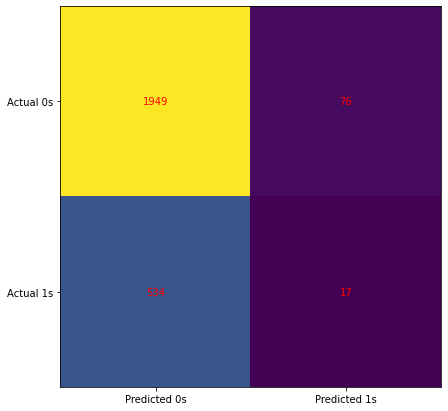

AUC: 0.5823163272165087


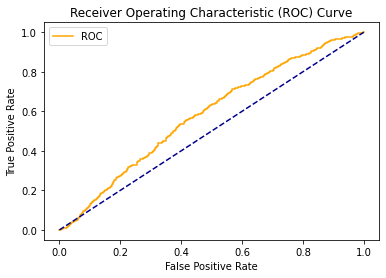

In [45]:
ytrain_pred = classifier.predict_proba(X_train)
print('ANN  train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred)))
ytest_pred = classifier.predict_proba(X_test)
print('ANN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred)))
y_pred_train = np.where(classifier.predict(X_train)>.5,1,0)
# Train Prediction classification report
print(classification_report(y_train,pd.DataFrame(y_pred_train.flatten()) ))

y_pred_test = np.where(classifier.predict(X_test)>.5,1,0)
# Test Prediction classification report
print(classification_report(y_test, y_pred_test))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

from sklearn import metrics
def plot_roc_curve(fpr, tpr,model):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test))
    print('AUC:', auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show( )

fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test) )
plot_roc_curve(fpr,tpr,classifier)

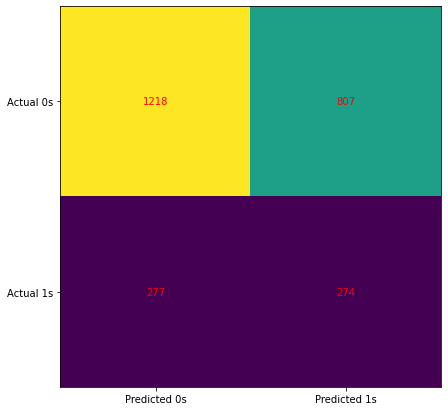

              precision    recall  f1-score   support

           0       0.92      0.70      0.79     23126
           1       0.42      0.78      0.55      6489

    accuracy                           0.72     29615
   macro avg       0.67      0.74      0.67     29615
weighted avg       0.81      0.72      0.74     29615

              precision    recall  f1-score   support

           0       0.81      0.60      0.69      2025
           1       0.25      0.50      0.34       551

    accuracy                           0.58      2576
   macro avg       0.53      0.55      0.51      2576
weighted avg       0.69      0.58      0.62      2576



In [46]:
y_pred_train = pd.DataFrame(classifier.predict(X_test).flatten())
from sklearn.metrics import f1_score
accuracy_ls=[]
for thres in thresholds:
    y_pred = np.where(y_pred_test>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

# Making the Confusion Matrix for threshold as accuracy threshold
from sklearn.metrics import confusion_matrix
y_pred_test = np.where(model.predict(X_test)>accuracy_ls.iloc[2,0],1,0)
cm = confusion_matrix(y_test,  y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

y_pred_train = np.where(model.predict(X_train)>accuracy_ls.iloc[2,0],1,0)
# Train Prediction classification report
print(classification_report(y_train,pd.DataFrame(y_pred_train.flatten()) ))

y_pred_test = np.where(model.predict(X_test)>accuracy_ls.iloc[2,0],1,0)
# Test Prediction classification report
print(classification_report(y_test, y_pred_test))

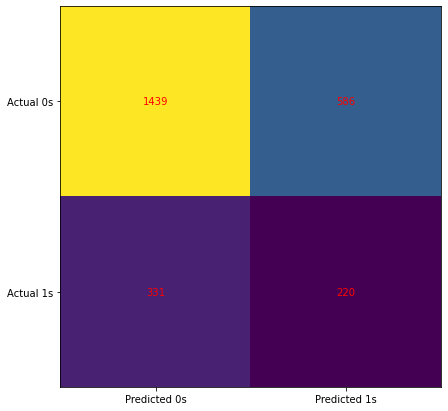

              precision    recall  f1-score   support

           0       0.90      0.79      0.84     23126
           1       0.48      0.68      0.56      6489

    accuracy                           0.77     29615
   macro avg       0.69      0.74      0.70     29615
weighted avg       0.81      0.77      0.78     29615

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2025
           1       0.27      0.40      0.32       551

    accuracy                           0.64      2576
   macro avg       0.54      0.55      0.54      2576
weighted avg       0.70      0.64      0.67      2576



In [47]:
y_pred_train = pd.DataFrame(model.predict(X_test).flatten())
from sklearn.metrics import f1_score
f1score_ls=[]
for thres in thresholds:
    y_pred = np.where(y_pred_test>thres,1,0)
    f1score_ls.append(f1_score(y_test, y_pred))
    
f1score_ls = pd.concat([pd.Series(thresholds), pd.Series(f1score_ls)],axis=1)
f1score_ls.columns = ['thresholds', 'f1score']
f1score_ls.sort_values(by='f1score', ascending=False, inplace=True)
f1score_ls.head()

# Making the Confusion Matrix for threshold as accuracy threshold
from sklearn.metrics import confusion_matrix
y_pred_test = np.where(model.predict(X_test)>f1score_ls.iloc[0,0],1,0)
cm = confusion_matrix(y_test,  y_pred_test)
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

y_pred_train = np.where(model.predict(X_train)>f1score_ls.iloc[0,0],1,0)
# Train Prediction classification report
print(classification_report(y_train,pd.DataFrame(y_pred_train.flatten()) ))

y_pred_test = np.where(model.predict(X_test)>f1score_ls.iloc[0,0],1,0)
# Test Prediction classification report
print(classification_report(y_test, y_pred_test))

In [47]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


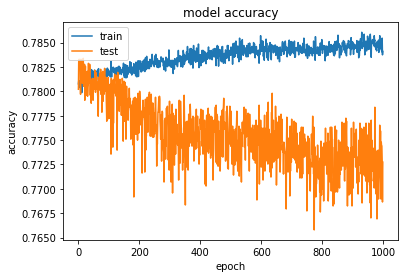

In [48]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

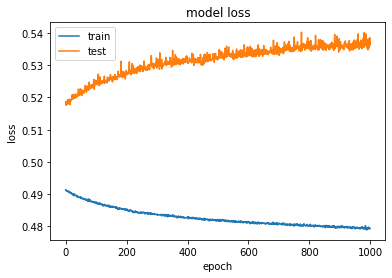

In [49]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [52]:
cm

array([[1966,   59],
       [ 535,   16]])

In [53]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [54]:
score

0.7694099378881988

Tuning the keras ANN

In [55]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [64]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 2.4MB/s 


In [65]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Loan_Default_Prediction')

In [66]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [67]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 03m 54s]
val_accuracy: 0.7861024737358093

Best val_accuracy So Far: 0.7861024737358093
Total elapsed time: 00h 15m 42s
INFO:tensorflow:Oracle triggered exit


In [68]:
tuner.get_best_hyperparameters

<bound method BaseTuner.get_best_hyperparameters of <kerastuner.tuners.randomsearch.RandomSearch object at 0x7f054266e6a0>>

In [69]:
tuner.get_best_models()

In [ ]:
# Weighted Neural Network With Keras
# Define Weights
# Fit the model with thos specific weights

In [72]:
weights_assigned={0:1,1:10}

In [73]:

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 48))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1,activation='sigmoid'))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10,class_weight=weights_assigned, epochs = 1000)


Epoch 1/1000
2962/2962 [==============================] - 6s 2ms/step - loss: 1.6764 - accuracy: 0.2426
Epoch 2/1000
2962/2962 [==============================] - 6s 2ms/step - loss: 1.6456 - accuracy: 0.2573
Epoch 3/1000
2962/2962 [==============================] - 5s 2ms/step - loss: 1.6370 - accuracy: 0.2700
Epoch 4/1000
2962/2962 [==============================] - 6s 2ms/step - loss: 1.6315 - accuracy: 0.2782
Epoch 5/1000
2962/2962 [==============================] - 6s 2ms/step - loss: 1.6261 - accuracy: 0.2826
Epoch 6/1000
2962/2962 [==============================] - 5s 2ms/step - loss: 1.6187 - accuracy: 0.2936
Epoch 7/1000
2962/2962 [==============================] - 5s 2ms/step - loss: 1.6097 - accuracy: 0.3064
Epoch 8/1000
2962/2962 [==============================] - 6s 2ms/step - loss: 1.6034 - accuracy: 0.3090
Epoch 9/1000
2962/2962 [==============================] - 5s 2ms/step - loss: 1.5932 - accuracy: 0.3250
Epoch 10/1000
2962/2962 [==============================] - 5s 2m

In [74]:
y_pred=model.predict(X_test)

In [76]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.5755273240572696

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  82, 1943],
       [  14,  537]])